# Graphs
This notebook creates the graphs for the concepts paper

Firstly, load in the required packages (if you use the dockerfile in .devcontainer everything should be there)

In [1]:
library(tidyverse)
library(hrbrthemes)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



Then we can define the function and vectorize it

In [2]:
f <- function(act_start, context, agent_pressure) {
    if (agent_pressure > 0) {
        return(min(1, act_start + (1 + context) / 2 * agent_pressure))
    } else {
        return(max(-1, act_start + (1 - context) / 2 * agent_pressure))
    }
}
vf <- Vectorize(f, vectorize.args = "agent_pressure")

Now apply this to three potential scenarios and create the tibble

In [3]:
x <- seq(-1, 1,  by = 0.01)
y0 <- vf(0.5, 1, x)
y1 <- vf(0.2, 0, x)
y2 <- vf(0.1, -0.75, x)
df <- tibble(
    x = x,
    y0 = y0,
    y1 = y1,
    y2 = y2
) %>% pivot_longer(-x)
df$name <- ifelse(
    df$name == "y0",
    "Activation=0.5; Context=1",
    ifelse(
        df$name == "y1",
        "Activation=0.2; Context=0",
        "Activation=0.1; Context=-0.75"
    )
)
head(df)

x,name,value
<dbl>,<chr>,<dbl>
-1.00,Activation=0.5; Context=1,0.50000
-1.00,Activation=0.2; Context=0,-0.30000
-1.00,Activation=0.1; Context=-0.75,-0.77500
-0.99,Activation=0.5; Context=1,0.50000
-0.99,Activation=0.2; Context=0,-0.29500
-0.99,Activation=0.1; Context=-0.75,-0.76625


Finally create the graph and export the figure!

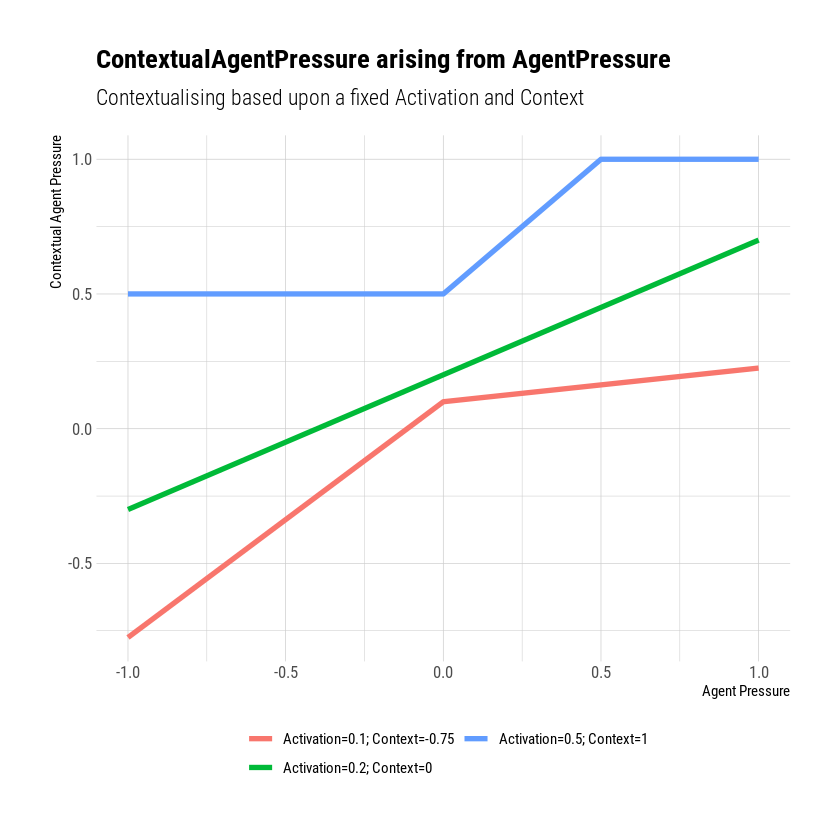

In [4]:
ggplot(df, aes(x = x, y = value, colour = name)) +
    geom_line(size = 1.5) +
    labs(
        x = "Agent Pressure",
        y = "Contextual Agent Pressure",
        colour = "",
        title = "ContextualAgentPressure arising from AgentPressure",
        subtitle = "Contextualising based upon a fixed Activation and Context"
    ) +
    guides(colour = guide_legend(ncol = 2)) +
    theme_ipsum_rc(base_size = 10) +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 9),
        plot.title = element_text(size = 16))
ggsave("contextualagentpressure.pdf", device = cairo_pdf, width = 6, height = 6, units = "in")